# INTIALIZATION

In [2]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/332.0 MB 1.8 MB/s eta 0:03:03
   ---------------------------------------- 1.0/332.0 MB 2.0 MB/s eta 0:02:44
   ---------------------------------------- 1.6/332.0 MB 2.2 MB/s eta 0:02:31
   ---------------------------------------- 2.1/332.0 MB 2.3 MB/s eta 0:02:25
   ---------------------------------------- 2.9/332.0 MB 2.5 MB/s eta 0:02:11
   ---------------------------------------- 3.9/332.0 MB 2.9 MB/s eta 0:01:52
    --------------------------------------- 4.7/332.0 MB 3.1 MB/s eta 0:01:45
    --------------------------------------- 5.8/332.0 MB 3.3 MB/s eta 0:01:39
    --------------------------------------- 7.1/332.0 MB 3.6 MB/s eta 0:01:30
   - -------------------------------------- 8.7/332.0 MB 4.0 MB/s eta 0:01:21


In [36]:

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Input

In [8]:
tf.__version__

'2.20.0-rc0'

# LOADING DATASET

The data used is [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html), which is a widely used benchmark dataset in the feild of computer vision and machine learning. It consists of 60,000  32x32 color images in 10 classes, with 6,000 images per class. It serves as a standard dataset for training and evaluating machine learning algorithms, particularly for image classification tasks.

The classes are: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck.

In [11]:
from keras.datasets import cifar10
(X_tarin,y_train),(X_test,y_test)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 37s 0us/step


In [14]:
print("X train: {}\n X test:{}\ny train: {}\ny test:{}".format(X_tarin.shape,X_test.shape,y_train.shape,y_test.shape))

X train: (50000, 32, 32, 3)
 X test:(10000, 32, 32, 3)
y train: (50000, 1)
y test:(10000, 1)


The dataset consists of 50,000 training images and 10,000 test images. Each image is 32x32 pixels in size and contains three color channels (red, green, and blue), indicating that the data is in RGB format. The associated labels for both the training and test sets are stored as single-column arrays, where each label corresponds to one image.

# IMAGE PREPROCESSING

Since we are dealing with a CNN model with multi class predictions, the true labels should be compatible with the output of CNN model. Thus, we have to convert the class labels into one-hot encoded vectors to represent them in a format that's more suitable for training a neural network.

In [16]:
y_train=tf.keras.utils.to_categorical(y_train,num_classes=10)
y_test=tf.keras.utils.to_categorical(y_test,num_classes=10)

Implementing data augmentation and image transformations to avoid over fitting. This helps to increase the diversity of the dataset and improve the generalization ability of the CNN model.

Transformations of training images are:
- Scale the pixel values of the images to be in the range [0, 1].
- Randomly apply shear transformations to the images.
- Randomly apply zoom transformations to the images.
- Randomly flip images horizontally.

In [20]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
                                 

In [21]:
train_generator=train_datagen.flow(
    X_tarin,y_train,
    batch_size=32
)

To avoid data leakage and over fitting, only pixel scaling is implemented on testing images.

In [22]:
test_datagen=ImageDataGenerator(
    rescale=1./255
)

In [23]:
test_generator=test_datagen.flow(
    X_test,y_test,
    batch_size=32
)

# BUILDING CNN MODEL

### Initializing CNN model

In [26]:
cnn=Sequential()

### Input Layer

In [27]:
cnn.add(Input(shape=(32,32,3)))

### Convolutional layers

We use 2 convolutional layers with an increasing number of filters to allow the model to capture more complex patterns in the images.

Convolutional layers are followed by max pooling layers to reduce the spatial dimensions of the feature maps and help in controlling overfitting by providing translation invariance.

In [30]:
# First conolutional layer
cnn.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation="relu"))

In [31]:
# Adding first pooling layer
cnn.add(MaxPool2D(pool_size=(2,2),strides=2))

In [33]:
# Adding second Convolutional layer
cnn.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation="relu"))

In [34]:
#Adding second pooling layer
cnn.add(MaxPool2D(pool_size=(2,2),strides=2))

### Flattening layer

This layer flattens the output from the convolutional layers into a one-dimensional vector, preparing it to be inputted into the dense layers.

In [37]:
# Adding Faltten Layer
cnn.add(Flatten())

### Fully Connected Layers pr Dense Layerrs

We use a dense layer as a fully connected layer to learn high-level features from the flattened input. Another dense layer is also added to further refining the learned features.

In [40]:
# Adding First Dense Layer
cnn.add(Dense(units=64,activation="relu"))

In [42]:
# Adding second dense layer
cnn.add(Dense(units=64,activation="relu"))

### Output layer

The final dense layer has 10 units (equal to the number of classes in the classification task) with a softmax activation, producing probabilities for each class.

In [43]:
# Adding output layer
cnn.add(Dense(units=10,activation="softmax"))

### Compile CNN model

In [46]:
cnn.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy","precision","recall","f1_score"])

### Train CNN model

In [48]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.5 MB ? eta -:--:--
    --------------------------------------- 0.5/38.5 MB 1.3 MB/s eta 0:00:29
    --------------------------------------- 0.8/38.5 MB 1.7 MB/s eta 0:00:23
   - -------------------------------------- 1.0/38.5 MB 1.5 MB/s eta 0:00:26
   - -------------------------------------- 1.6/38.5 MB 1.6 MB/s eta 0:00:24
   - -------------------------------------- 1.8/38.5 MB 1.5 MB/s eta 0:00:25
   -- ------------------------------------- 2.4/38.5 MB 1.7 MB/s eta 0:00:22
   --- ------------------------------------ 3.1/38.5 MB 2.0 MB/s eta 0:00:19
   ---- ----------------------------------- 3.9/38.5 MB 2.2 MB/s eta 0:00:16
   ----- ---------------------------------- 5.0/38.5 MB 2.5 MB/s eta 0:00:14
   ------ --------------------------------- 6.3/38.5 MB 2.9 MB/s eta 0:00:12
   ------- -

In [49]:
history=cnn.fit(
    train_generator,
    epochs=25,
    validation_data=test_generator
)

Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.2020 - f1_score: 0.1760 - loss: 2.0263 - precision: 0.3287 - recall: 0.0104

C:\Users\santo\AppData\Roaming\Python\Python313\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 93s 57ms/step - accuracy: 0.2839 - f1_score: 0.2665 - loss: 1.8290 - precision: 0.5996 - recall: 0.0438 - val_accuracy: 0.4208 - val_f1_score: 0.4023 - val_loss: 1.5218 - val_precision: 0.6545 - val_recall: 0.1466
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 58ms/step - accuracy: 0.4531 - f1_score: 0.4449 - loss: 1.4636 - precision: 0.6659 - recall: 0.2182 - val_accuracy: 0.4972 - val_f1_score: 0.4739 - val_loss: 1.3593 - val_precision: 0.6481 - val_recall: 0.3405
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 62ms/step - accuracy: 0.5082 - f1_score: 0.5020 - loss: 1.3326 - precision: 0.6969 - recall: 0.3109 - val_accuracy: 0.5609 - val_f1_score: 0.5544 - val_loss: 1.2051 - val_precision: 0.7128 - val_recall: 0.3923
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 62ms/step - accuracy: 0.5431 - f1_score: 0.5378 - loss: 1.2554 - precision: 0.7140 - recall: 0.3683 - val_accuracy: 0.5714 - val_f1_score: 0.5599 - val_loss: 1.1873 - val_precision: 0.7240 - val_re

### Performance Analysis

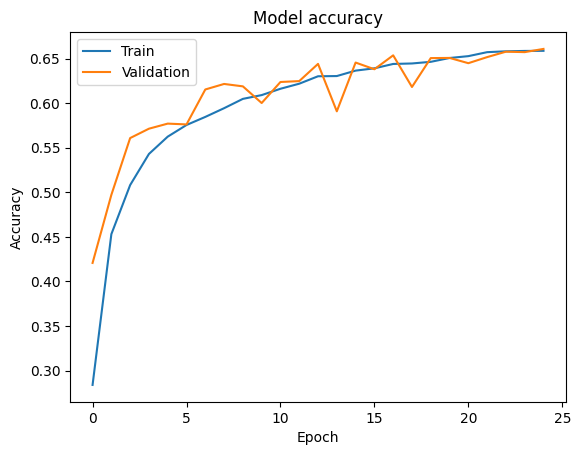

In [51]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

The results highlights the following points:

- The training accuracy steadily increases as the number of epochs increases. This indicates that the model is learning and improving its performance on the training data.
- The validation accuracy initially increases as the model learns more representations from the training data.
- However, after reaching a peak around the 9th epoch, the validation accuracy starts to fluctuate. This might indicate that the model is beginning to overfit, as it fails to generalize well to unseen data.
- The gap between training and validation accuracy starts to widen after a certain point, indicating increasing overfitting as training progresses.
- To address overfitting, techniques such as regularization (e.g., dropout, weight decay), early stopping, or data augmentation could be applied.

In summary, while the model shows promising learning capabilities initially, it demonstrates signs of overfitting later in the training process. Further optimization and regularization techniques are needed to improve generalization performance.